O código abaixo podemos obter o valor numérico, que representa a cor de um pixel em uma imagem colorida:

In [2]:
import cv2
imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/livro-visao-computacional-master/imagens/cap04/002.png')
valorPixel = imagem[150,150]
print(valorPixel) # RGB

[ 24  32 184]


In [3]:
# em tons de cinza só apresentará um único valor

import cv2
imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/livro-visao-computacional-master/imagens/cap04/002.png')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
ValorPixel = imagem_cinza[150, 150]
print(ValorPixel)

47


In [4]:
# em imagens coloridas podemos obter a intensidade da cor de um único canal

import cv2
imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/livro-visao-computacional-master/imagens/cap04/002.png')
ValorPixel = imagem[150, 150, 0] # BGR=[0,1,2]
print(ValorPixel)

24


In [10]:
# podemos alterar o valor de um determinado pixel da imagem atribuindo um novo valor

import cv2
imagem = imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/livro-visao-computacional-master/imagens/cap04/002.png')
print(imagem[150,150])
imagem[150,150]=[250,250,250]
print(imagem[150,150])


[ 24  32 184]
[250 250 250]


## Acessando informações sobre a imagem

A bibliotexa OpenCV também nos permite obter algumas informações básicas sobre a imagem, como:
* Números de linhas;
* Números de colunas;
* Canais;
* Quantidade de pixels.


In [15]:
# shape => obtemos o número de linhas, colunas e canais.

import cv2
imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/livro-visao-computacional-master/imagens/cap04/002.png')
print(imagem.shape)


(600, 800, 3)


In [12]:
# size => obteremos o total de pixels da imagem, ou podemos multiplicar o total de linhas por colunas por canais

import cv2
imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/livro-visao-computacional-master/imagens/cap04/002.png')
print(imagem.size)

1440000


## Histograma de cores

O histograma de cores de uma imagem é a distribuição de  frequência dos níveis de cinza em relação ao número de amostras. Essa distribuição nos fornece informaçãoes sobre a qualidade da imagem, principalmente no que diz respeito à intensidade luminosa e ao contraste.

### Histograma em uma imagem binária

Por possuir pixels representados apenas pela cor preta ou branca.

O total de pixels da imagem subtraído do total de pixels de uma determinada cor nos fornece a quantidade de pixels pretos ou brancos representados.

Estes dados são suficientes para plotar o histograma de uma imagem binária. O total de pixels pretos ou brancos pode ser obtido percorrendo todo a a matriz que representa a imagem, contando-os individualmente, assim como exemplificado no código:

In [24]:
import cv2

imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/flor_binaria.png',0) # o 0 indica a leitura da imagem em tons de cinza
forma = imagem.shape
totalPixelsBranco = 0
totalPixelsPreto = 0

for x in range(0, forma[0]):
    for y in range(0,forma[1]):
        if imagem[x,y] == 255:
            totalPixelsBranco +=1
        else:
            totalPixelsPreto +=1

print(totalPixelsBranco)
print(totalPixelsPreto)

192281
58219


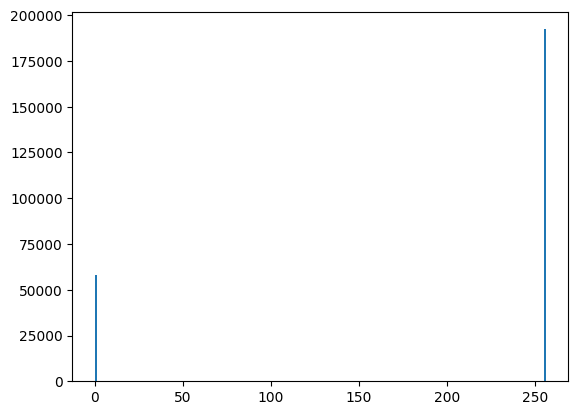

In [25]:
# utilizando o Matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as grafico

imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/flor_binaria.png',0) 
grafico.hist(imagem.ravel(), 256, [0, 256])
grafico.show()


### Histograma em uma imagem em tons de cinza


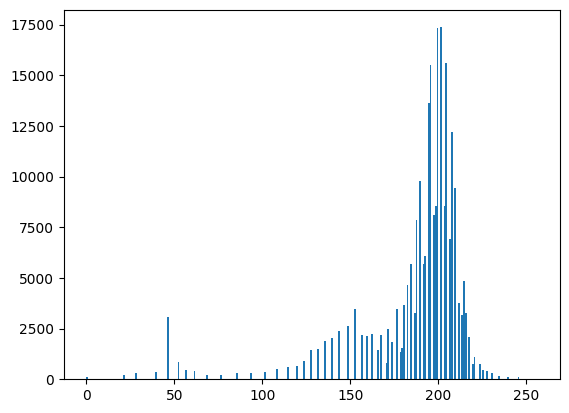

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as grafico

imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/for_cinza.png',0)
grafico.hist(imagem.ravel(), 256, [0, 256])
grafico.show()

O código a seguir demonstra como obter o histograma de cada candl individualmente

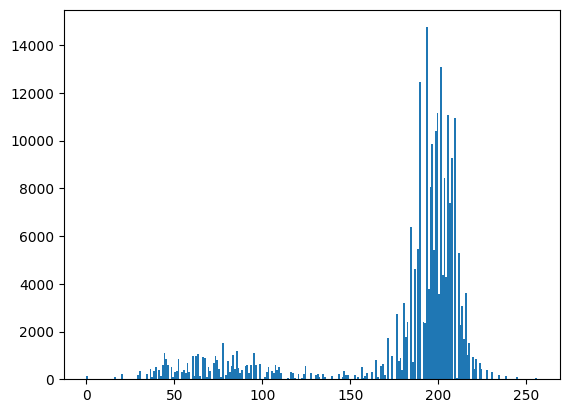

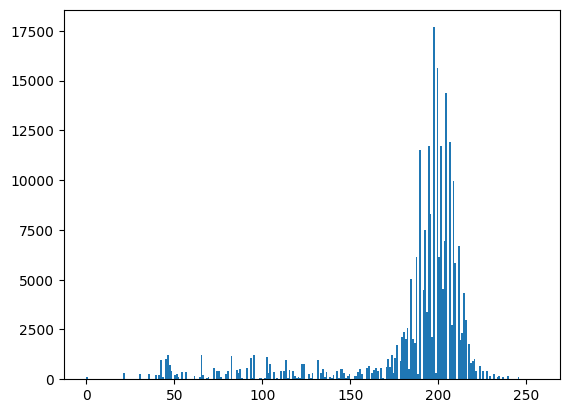

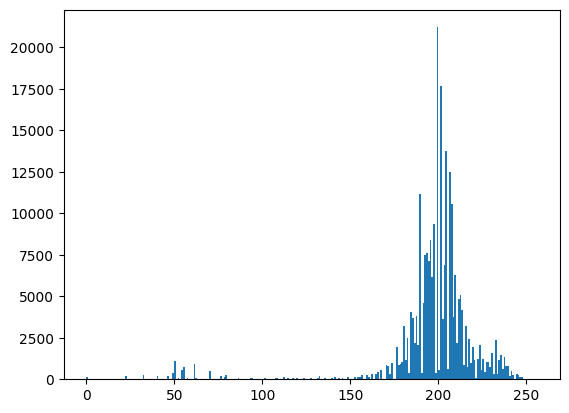

<Figure size 640x480 with 0 Axes>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as grafico

imagem = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/for_colorida.png')
azul, verde, vermelho = cv2.split(imagem)

grafico.hist(azul.ravel(), 256, [0,256])
grafico.figure()
grafico.hist(verde.ravel(), 256, [0,256])
grafico.figure()
grafico.hist(vermelho.ravel(), 256, [0,256])
grafico.figure()

grafico.show()

## Equalização de histograma

Imagens superexpostas (ou seja, com alto nível de luminosidade) geralmente apresentam histogramas com a maior parte dos elementos concentrados à direita. Do contrário, histogramas que possuem maior parte dos elementos concentrados à esquerda tendem a representar imagens subexpostas, com baixo nível de luminosidade

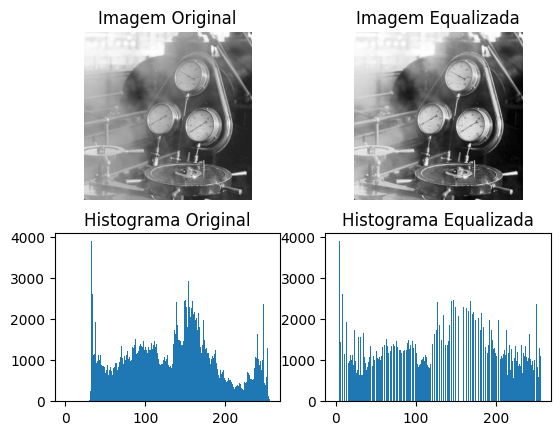

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagemOriginal = cv2.imread('C:/Users/hyago/documentos/Meusprojetos/python/computacao_visual/maquina.jpg',0)
imagemEquilizada = cv2.equalizeHist(imagemOriginal)
# Exibe a imagem original
plt.subplot(2,2,1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(imagemOriginal, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Imagem Equalizada')
plt.imshow(cv2.cvtColor(imagemEquilizada, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.subplot(2,2,3)
plt.title('Histograma Original')
plt.hist(imagemOriginal.ravel(), 256, [0,256])

plt.subplot(2,2,4)
plt.title('Histograma Equalizada')
plt.hist(imagemEquilizada.ravel(), 256, [0,256])

plt.show()